Chi² = 105.36, p-value = 2.60e-10


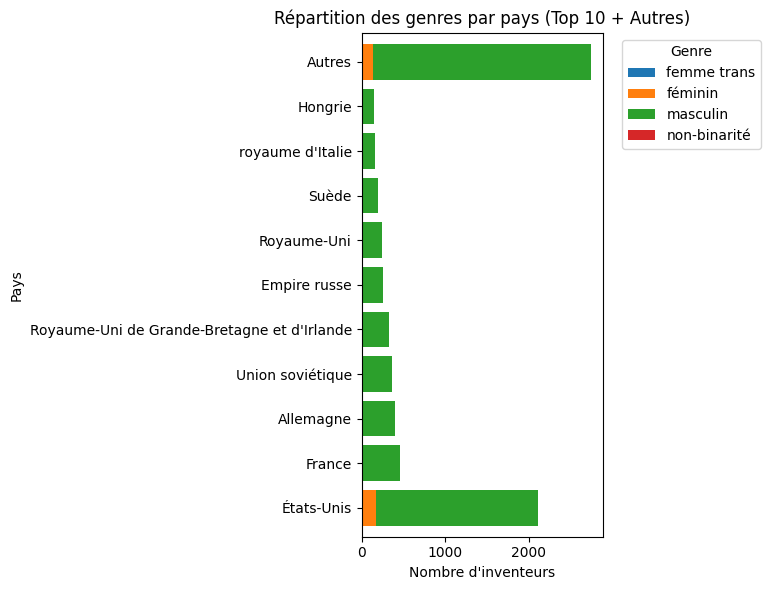

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Charger et nettoyer
df = pd.read_csv("../data/inventors_gender_country.csv")
df = df.dropna(subset=['countryLabel', 'genderLabel'])

# Compter le total par pays
totaux = df['countryLabel'].value_counts()

# Déterminer les top 10 pays
top10 = totaux.nlargest(10).index

# Remplacer les autres par "Autres"
df['country_top'] = df['countryLabel'].where(df['countryLabel'].isin(top10), 'Autres')

# Refaire le tableau de contingence
contingency = pd.crosstab(df['country_top'], df['genderLabel'])

# Test du Chi² (sur le top10 + Autres)
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi² = {chi2:.2f}, p-value = {p:.2e}")

# Préparer la figure
plt.figure(figsize=(8, 6))

# Barplot horizontal empilé
contingency.loc[top10.tolist() + ['Autres']].plot(
    kind='barh',
    stacked=True,
    width=0.8,
    ax=plt.gca()
)

plt.xlabel("Nombre d'inventeurs")
plt.ylabel("Pays")
plt.title("Répartition des genres par pays (Top 10 + Autres)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
